<a href="https://colab.research.google.com/github/kim-daehyun/study_trace/blob/Computer-Statistics/10_One_proportion_z_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%matplotlib inline
from scipy import stats
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Example

In [2]:
# You have assumed the population of the data to be in Category A is 0.3.

# And, here is a sample. In this sample, each data point has a value of 1,
# if it is in Category A. Otherwise, it has 0. 

# Now, you want to test if the sample shows your current assumption is still valid.
sample = [1,0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 
          1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0]

# Calculate the sample statistics
sample_proportion = np.mean(sample)
print("Proportion: {}".format(sample_proportion))

# Let's check the significance of the difference by the one-proportion z-test.

Proportion: 0.4666666666666667


# Step 1. Define null and alternative hypotheses

In [3]:
# H0 : mu = 0.3
print("H0: The population proportion is 0.3.")

# H1 : mu != 0.3
print("H1: The population proportion is not equal to 0.3.")

H0: The population proportion is 0.3.
H1: The population proportion is not equal to 0.3.


# Step 2. Calculate a test statistic

In [5]:
# z = Sample error/std_error

sample_error = sample_proportion - 0.3

# std_error = sigma / sqrt(n)
# sigma = sqrt(prop * (1-prop))

standard_error = np.sqrt(0.3*0.7) / np.sqrt(len(sample))

z = sample_error / standard_error

print("Test statistic z : {}".format(z))

Test statistic z : 1.9920476822239896


# Step 3. Check how likely the test statistic can be obtained.

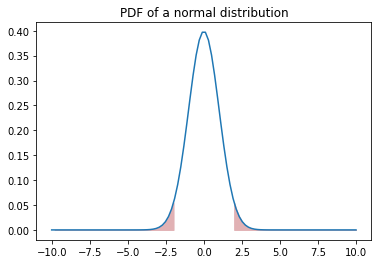

In [9]:
z_dist = stats.norm(loc=0, scale=1)
x = np.linspace(-10,10,100)
y = z_dist.pdf(x)
plt.plot(x,y)
plt.title("PDF of a normal distribution")

# Fill the area of the values to be 
# as extreme as or more extreme than the test statistic. (p-value)
right_interval = np.linspace(abs(z), x[-1], 50)
left_interval = np.linspace(-x[-1], -abs(z) , 50)
plt.fill_between(right_interval, z_dist.pdf(right_interval), color = '#e1b1b4', alpha = 1)
plt.fill_between(left_interval, z_dist.pdf(left_interval), color = '#e1b1b4', alpha = 1)

In [11]:
# Calculate the p-value.
p, _ = integrate.quad(z_dist.pdf, left_interval[0],  left_interval[-1])
p *= 2

print('The p-value for this test : {}'.format(p))


The p-value for this test : 0.046365826437845016


In [12]:
# Conclusion (Significance level = 5%)
if p < 0.05:
  print("Reject H0 : The population mean is not equal to 0.3.")
else : 
  print("Accept H0: The population mean is 0.3.")

Reject H0 : The population mean is not equal to 0.3.



##### [Additional] You can calculate the p-value by the SF. 

In [14]:
p = z_dist.sf(abs(z)) * 2       #sf : 살아남은 상위 비율
print("p-value : {0}".format(p))

cv = z_dist.ppf(.975)
print("Critical values (alpha = 0.05): -{0}, {0}".format(cv))

p-value : 0.046365826437845
Critical values (alpha = 0.05): -1.959963984540054, 1.959963984540054


# (Step 4) Calculate the effect size

In [ ]:
# The effect size for one-sample t-test is cohen's d.
# d = | sample_mean - mu | / sample_std

d = abs(sample_proportion - 0.3) / np.sqrt(0.3 * (1-0.3))

print("Effect size: {}".format(d))